# MFM : Intro to Data Analysis with Python

Pengenalan data analisis menggunakan Python 

# Author

Ardya Dipta Nandaviri (ardyadipta@gmail.com)  
linkedin: https://www.linkedin.com/in/ardya-dipta-nandaviri-27717931/ 

## Outline

    1. Data discovery with Pandas
    2. Feature Selection with Data visualization
        2.1. Normalization & Standardization
        2.2. Data Correlation
        2.3. Feature Reduction

    
## Data 

* Data diambil dari open data source Pima Indians Diabetes Dataset
* Sumber : https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv 
* Deskripsi : 
    
        Prediksi penyakit diabetes dalam 5 tahun dengan data rekam medis
        Problem: Binary Classification Problem (2-class)
        
## Referensi

* Sumber dataset lain: https://machinelearningmastery.com/standard-machine-learning-datasets/ 
* Pandas : https://pandas.pydata.org/
* Seaborn tutorial: https://www.tutorialspoint.com/seaborn/seaborn_tutorial.pdf 
* Visualisasi data menggunakan Seaborn : https://www.kaggle.com/kanncaa1/feature-selection-and-data-visualization
* Data Analysis with Python
![Other source](img/book.jpg)

# 1. Data Discovery with Pandas

Pada bab ini kita akan melakukan data discovery / eksplorasi dengan tools Pandas 

## 1.0. Import Libraries 

In [9]:
import numpy as np # untuk linear algebra
import pandas as pd # data processing, CSV file I/O
import seaborn as sns # Data Visualization library
import matplotlib.pyplot as plt

import time # Untuk time recording

## 1.1. Import Data

In [5]:
df = pd.read_csv("../data/raw/pima-indians-diabetes.data.csv")

### pandas.read_csv()

Import sebuah file csv ke dalam Pandas Dataframe.
Semua data yang diproses ini dalam bentuk Pandas Dataframe untuk memudahkan kita dalam eksplorasi dan manipulasi data


## 1.2. Basic Data Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
number_of_times_pregnant         768 non-null int64
plasma_glucose                   768 non-null int64
diastolic_blood_pressure_mmhg    768 non-null int64
tricep_skinfold_thickness_mm     768 non-null int64
serum_insulin_mu_u_per_ml        768 non-null int64
boday_mass_index_kg_per_m2       768 non-null float64
diabetes_pedigree                768 non-null float64
age_years                        768 non-null int64
class                            768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### pandas.info()
dengan menggunakan fungsi **info()** kita bisa melihat variabel apa saja yang ada pada data ini. 
Bisa dilihat bahwa total ada 9 kolom, dengan tipe data integer dan float. 

Dari total baris berjumlah 767 entries, dapat dipastikan bahwa setiap kolom tidak ada data yang hilang karena jumlah nya sama dengan jumlah total baris. 

Fungsi ini juga dapat dilihat penggunaan memory oleh data ini, yaitu 54.0 KB. Untuk saat ini mungkin tidak terlalu penting karena datanya kecil, namun untuk data yang sangat besar, angka ini sangat penting untuk memperkirakan ukuran Memory RAM yang dibutuhkan oleh sebuah mesin dalam memproses data. 

In [7]:
df.head() # melihat beberapa baris teratas dari sebuah dataframe. 

,number_of_times_pregnant,plasma_glucose,diastolic_blood_pressure_mmhg,tricep_skinfold_thickness_mm,serum_insulin_mu_u_per_ml,boday_mass_index_kg_per_m2,diabetes_pedigree,age_years,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Dapat dilihat dari data di atas, semua variabel berupa integer atau float. ** class ** adalah label klasifikasi kita.

In [11]:
# Eksplorasi terdapat feature apa saja pada data
for col in df.columns:
    print(col)

number_of_times_pregnant
plasma_glucose
diastolic_blood_pressure_mmhg
tricep_skinfold_thickness_mm
serum_insulin_mu_u_per_ml
boday_mass_index_kg_per_m2
diabetes_pedigree
age_years
class


In [14]:
# Mari kita pisahkan antara feature dan label
# pada umumnya feature didefinisikan sebagai X, dan label sebagai y

X = df.drop("class", axis = 1) # semua kolom selain "class" adalah feature
y = df["class"] # label kita adalah kolom "class"

In [15]:
X.head()

,number_of_times_pregnant,plasma_glucose,diastolic_blood_pressure_mmhg,tricep_skinfold_thickness_mm,serum_insulin_mu_u_per_ml,boday_mass_index_kg_per_m2,diabetes_pedigree,age_years
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


Jumlah terdiagnosis sehat:  500
Jumlah terdiagnosis Diabetes:  268


/Users/ardyadipta/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


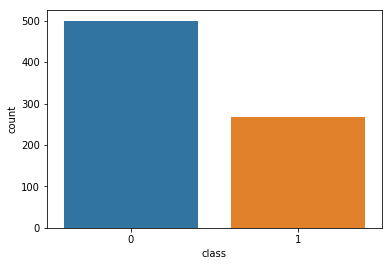

In [21]:
ax = sns.countplot(y, label="Count")
S, D = y.value_counts()
print("Jumlah terdiagnosis sehat: ", S)
print("Jumlah terdiagnosis Diabetes: ", D)
plt.show()

Dari grafik di atas dapat dilihat bahwa label data tersebut tidak seimbang. Data yang terlabel diabetes (warna oranye) memiliki jumlah hampir setengahnya dari data yang sehat. 

Berikutnya mari kita lihat sisi statistik dari data seperti ** variance, standard deviasi, jumlah sample, atau max dan min** . Informasi-informasi tersebut sangat membantu untuk mengerti data. 
Contohnya, apakah kita membutuhkan standardization atau normalization untuk visualisasi data? 
Jika melihat pada kolom ** diabetes_pedigree ** yang memiliki max ** 2.42 ** dan ** serum_insulin_mu_u_per_ml ** yang memiliki max 846, jawabannya adalah ** ya ** 

Mari kita lanjut dengan visualisasi data

In [25]:
X.describe() # fungsi describe untuk melihat analisis data secara umum

,number_of_times_pregnant,plasma_glucose,diastolic_blood_pressure_mmhg,tricep_skinfold_thickness_mm,serum_insulin_mu_u_per_ml,boday_mass_index_kg_per_m2,diabetes_pedigree,age_years
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


# 2. Feature Selection with Data Visualization

bab ini membahas bagaimana kita memilih feature untuk machine learning dengan data visualization

## 2.1. Normalization & Standardization

Pada subbab ini akan dibahas Normalization dan Standardization.

** Normalization ** : rescale data sehingga nilainya berkisar antara [0,1]. Namun perlu diingat dengan normalisasi, informasi mengenai outlier data akan menjadi bias, karena memiliki max 1. Jika ada outlier, data yang "normal" akan memiliki interval data yang teramat kecil. Pada kasus di dunia nyata, hampir semua data memiliki outlier. 

** Standardization ** : rescale data sehingga memiliki mean 0 dan unit variance. Saat menggunakan standardization, data tidak terbatas antara [0,1], namun berapa variance. 

sumber: http://www.dataminingblog.com/standardization-vs-normalization/ 

/Users/ardyadipta/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:647: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data[hue_mask])
/Users/ardyadipta/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:895: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data[hue_mask])
/Users/ardyadipta/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:915: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


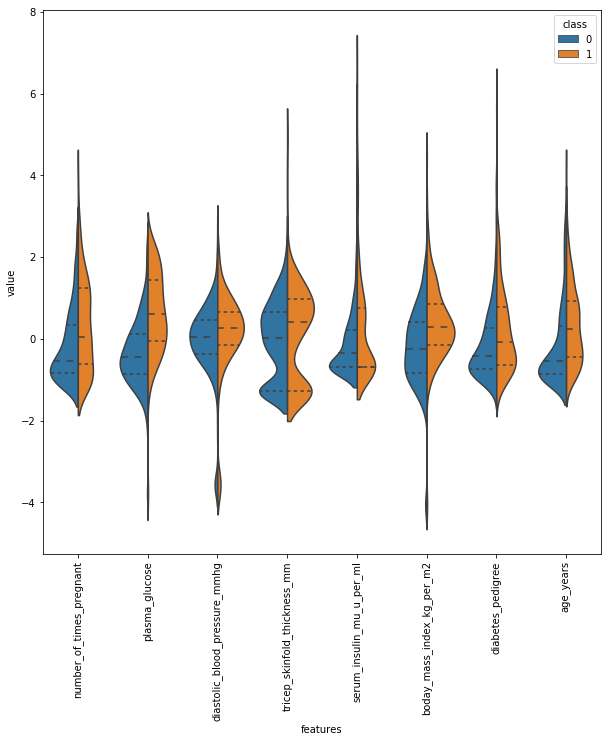

In [34]:
data_standardized = (X - X.mean() ) / X.std()
data = pd.concat([y, data_standardized], axis =1)
data = pd.melt(data, id_vars = "class",
                var_name="features",
                value_name="value"
              )
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="class", 
              data=data, split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

Grafik di atas menggambarkan keterkaitan antara 'bentuk' data untuk masing-masing feature dengan ** class ** masing-masing. Dapat kita interpretasikan beberapa hal seperti berikut:

* Pada feature **plasma_glucose** dapat dilihat terpisah, feature ini bisa menjadi feature yang baik untuk klasifikasi.
* Namun pada **diabetes_pedigre** menunjukkan bahwa nilainya tidak terlalu terlihat terpisah. 
* Pada **diabetes_pedigree** dan **age_years** memiliki kemiripan, ada kemungkinan kedua feature ini saling ter-korelasi. Jika benar demikian, salahs atu feature tersebut bisa kita drop. 

## 2.2. Data Correlation

Pada subbab ini kita akan melakukan feature selection dan mengecek data correlation antara features.
Feature selection merupakan proses untuk memilih feature apa saja yang akan digunakan untuk training model machine learning. 

**Kenapa Feature Selection penting?** supaya data menjadi lebih sederhana dan proses training model lebih cepat. 
Pada feature selection ini perlu dicek korelasi antar features, yaitu hubungan antar 2 variabel data.

Untuk mengecek korelasi antar features, dapat kita gunakan joint plot. 

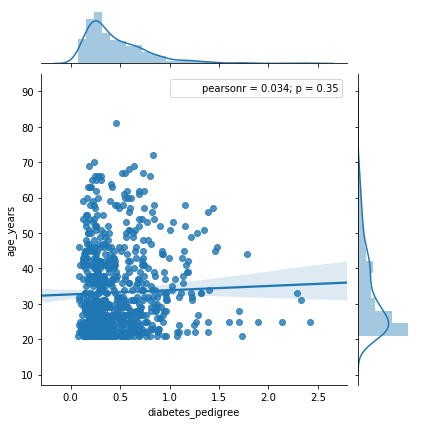

In [35]:
sns.jointplot(X.loc[:,'diabetes_pedigree'], X.loc[:,'age_years'], kind='regg')
plt.show()

Dari pearson value tersebut sebesar 0.034, ternyata dapat disimpulkan bahwa data tersebut tidak terkorelasi. Pearson value memiliki nilai maksimum 1, dan nilai 1 menggambarkan bahwa kedua features memiliki korelasi sempurna.

Berikut kita juga bisa menggunakan swarm plot untuk melihat karakteristik class data kita berdasarkan masing-masing feature.

In [52]:
sns.set(style="whitegrid", palette="muted")
data_standardized = (X - X.mean()) / (X.std())              # standardization
data = pd.concat([y,data_standardized],axis=1)
data = pd.melt(data,id_vars="class",
                    var_name="features",
                    value_name='value')


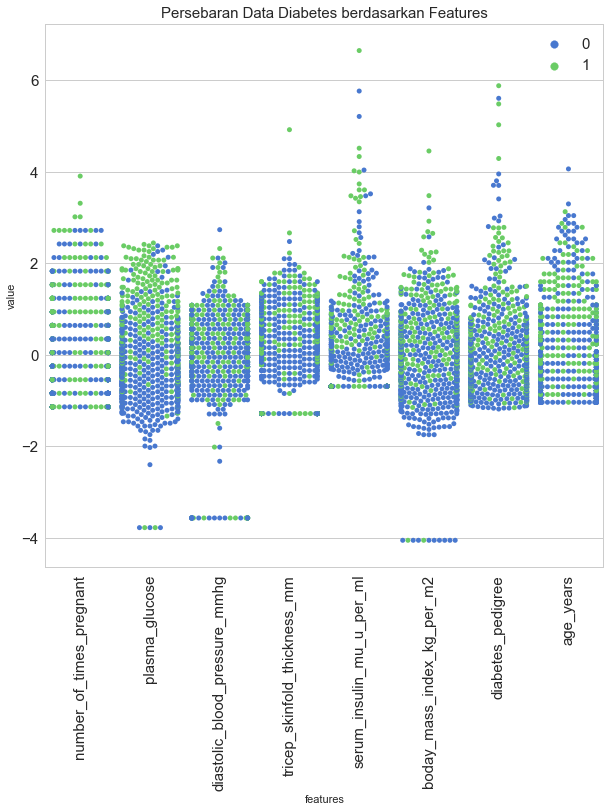

In [53]:
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="class", data=data)
plt.title("Persebaran Data Diabetes berdasarkan Features", fontsize=15)
plt.legend(fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(rotation=90, fontsize=15)
plt.show()

Dari grafik di atas dapat dilihat variance data dengan lebih jelas. 
Feature manakah yang kira-kira paling berguna dalam problem klasifikasi ini? 
Dari grafik di atas, mungkin dapat dipastikan bahwa feature **plasma_glucose** adalah yang paling dapat menggambarkan klasifikasi ini, karena bola-bola biru dan hijaunya bisa terlihat terpisah, sementara feature yang lain masih banyak yang tercampur.

Namun bagaimana jika kita ingin eksplorasi seluruh feature yang terkorelasi? 
**Heatmap** adalah plot yang tepat untuk melihatnya.

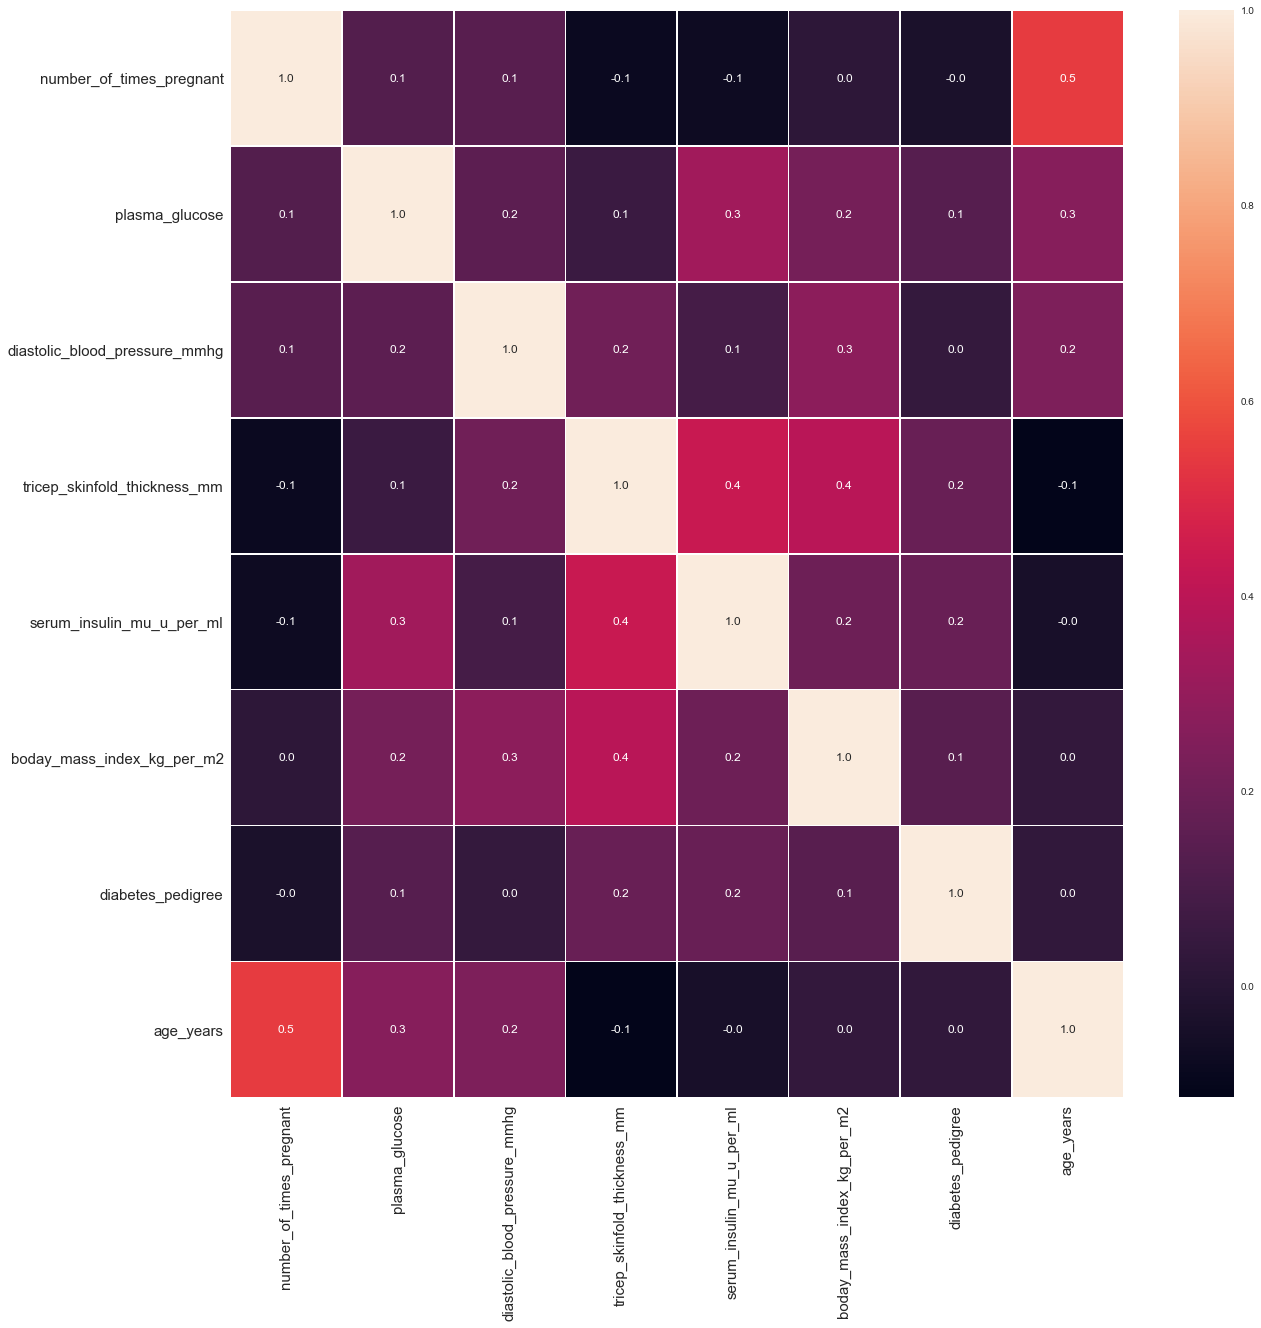

In [59]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(X.corr(), annot=True, linewidths=0.5, fmt='.1f', ax=ax, )
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

Dari correlation map di atas, maka kita sekarang bisa memilih mana feature yang penting untuk digunakan pada klasifikasi ini.

Jika kita lihat pada correlation heatmap di atas, bisa kita simpulkan bahwa **tidak ada feature yang terkorelasi** karena tidak ada yang memiliki nilai pearson > 0.5 antar features. Jika ada, sebaiknya salah satu variabel tersebut didrop.